### Import Necessaries Libraries

In [1]:
## main libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


## preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

## model selection
from sklearn.model_selection import train_test_split


## models
from sklearn.cluster import KMeans
from sklearn import tree

## save model
import pickle
import joblib

## others
import warnings
warnings.filterwarnings("ignore")

### Load the data And Look at the big picture

In [4]:
## read csv file
data = pd.read_csv("daily_weather_2020.csv")

## show the head
data.head()

,Unnamed: 0,Country/Region,Province/State,time,summary,icon,sunriseTime,sunsetTime,moonPhase,precipIntensity,...,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,Lat,Long,precipAccumulation
0,0,Afghanistan,NaN,2019-12-31,Rain (with a chance of 1–3 in. of snow) until ...,rain,1.577847e+09,1.577883e+09,0.20,0.0156,...,1577827140,48.36,1577864700,30.51,1577835720,47.86,1577864700,33.0,65.0,NaN
1,1,Afghanistan,NaN,2020-01-01,Light rain throughout the day.,rain,1.577933e+09,1.577969e+09,0.23,0.0235,...,1577918820,40.42,1577951460,29.84,1577919420,40.08,1577951220,33.0,65.0,NaN
2,2,Afghanistan,NaN,2020-01-02,Clear throughout the day.,rain,1.578019e+09,1.578056e+09,0.26,0.0016,...,1578020400,46.53,1578038340,26.27,1578020400,46.03,1578038340,33.0,65.0,NaN
3,3,Afghanistan,NaN,2020-01-03,Partly cloudy throughout the day.,partly-cloudy-day,1.578106e+09,1.578142e+09,0.30,0.0003,...,1578106320,45.77,1578124500,26.96,1578093240,45.35,1578124260,33.0,65.0,NaN
4,4,Afghanistan,NaN,2020-01-04,Light rain throughout the day.,rain,1.578192e+09,1.578228e+09,0.33,0.0145,...,1578193080,40.84,1578222000,33.33,1578193080,40.34,1578222000,33.0,65.0,NaN


In [5]:
## Select Important Features 
df=data[['temperatureHigh','humidity','uvIndex']]

In [6]:
## check info (nulls and data types)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30688 entries, 0 to 30687
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temperatureHigh  30688 non-null  float64
 1   humidity         30688 non-null  float64
 2   uvIndex          30688 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 719.4 KB


In [7]:
## some statistics
df.describe().round(2)

,temperatureHigh,humidity,uvIndex
count,30688.00,30688.00,30688.00
mean,63.82,0.69,5.50
std,22.64,0.20,3.35
min,-64.30,0.02,0.00
25%,47.40,0.59,3.00
50%,65.52,0.73,5.00
75%,82.75,0.82,8.00
max,111.61,1.00,16.00


In [8]:
## check nulls
df.isna().sum()

temperatureHigh    0
humidity           0
uvIndex            0
dtype: int64

### Exploratory Data Analysis (EDA)

categories of (uvIndex) --- 
 6     3429
2     3405
3     3350
4     3156
5     2808
1     2739
7     2551
8     2144
9     1868
10    1603
11    1245
12     898
0      776
13     535
14     153
15      27
16       1
Name: uvIndex, dtype: int64


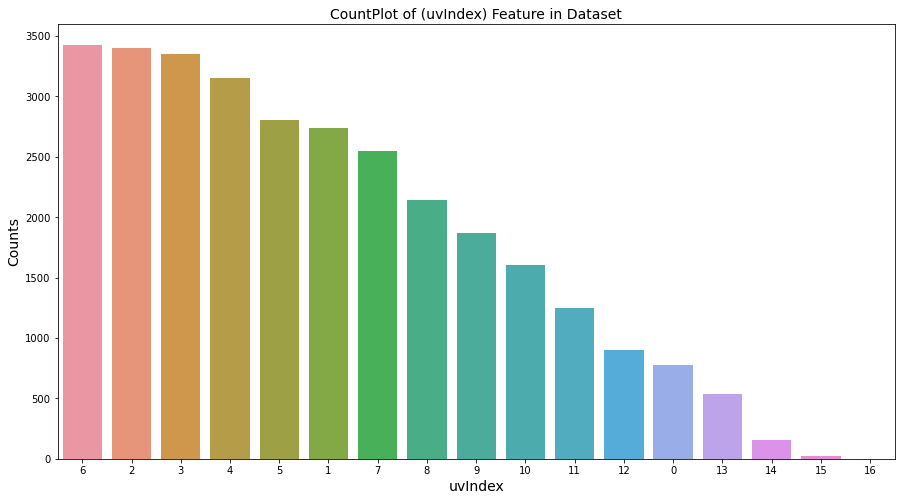

In [9]:
## Check the Distribution of (uvIndex) Feature in Dataset
uv_values = df['uvIndex'].value_counts()
print('categories of (uvIndex) --- \n', uv_values)




## plotting
plt.figure(figsize=(15,8))
sns.countplot(data=df , x = 'uvIndex' , order= uv_values.index)
plt.title("CountPlot of (uvIndex) Feature in Dataset", fontsize=14, c='k')
plt.xlabel('uvIndex', fontsize=14, c='k')
plt.ylabel('Counts', fontsize=14, c='k')
plt.show()

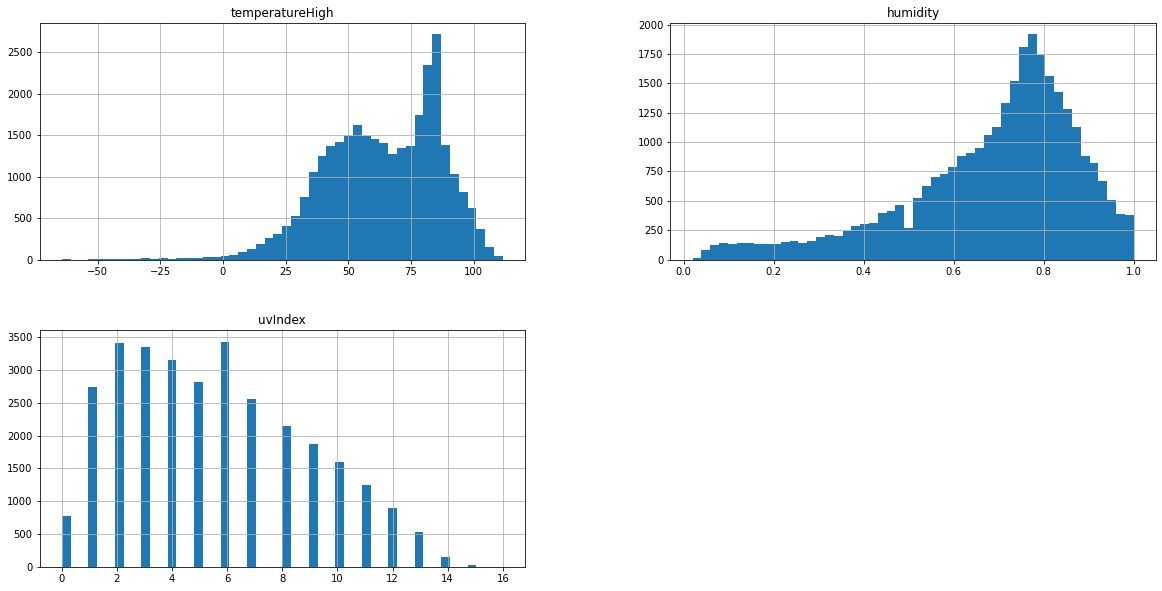

In [10]:
## Histogram for numerical values
df.hist(bins = 50 ,figsize=(20,10))
plt.show()

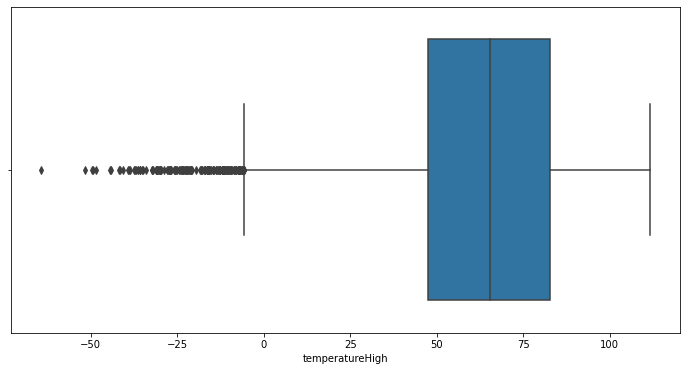

In [11]:
## identify outliers by boxplot
plt.figure(figsize=(12,6))
sns.boxplot(df['temperatureHigh'])
plt.show()

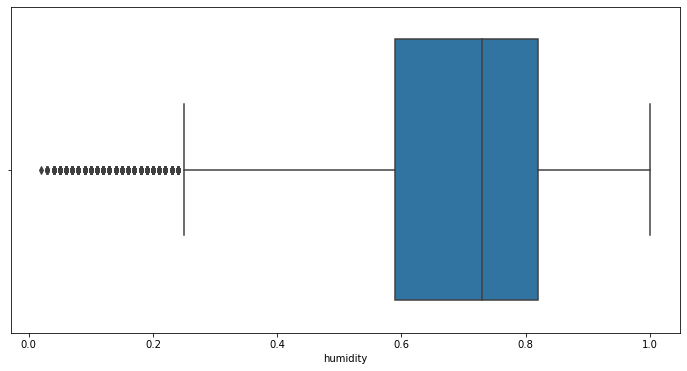

In [12]:
## identify outliers by boxplot
plt.figure(figsize=(12,6))
sns.boxplot(df['humidity'])
plt.show()

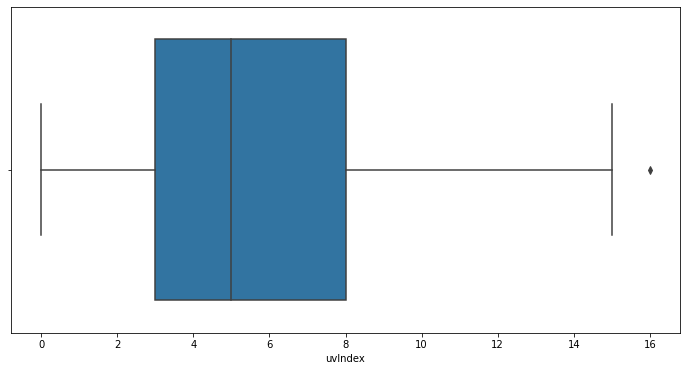

In [13]:
## identify outliers by boxplot
plt.figure(figsize=(12,6))
sns.boxplot(df['uvIndex'])
plt.show()

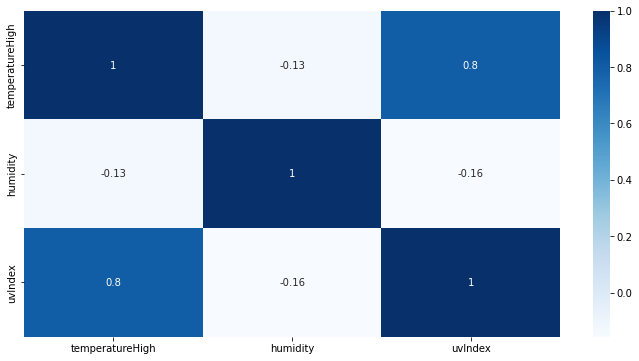

In [14]:
## check correlation between features
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cmap ='Blues')
plt.show()

### Preprocessing 

In [15]:
## convert temp from F to C
df["temperatureHigh"] = (df["temperatureHigh"] - 32) * 5/9

## show the head
df.head()

,temperatureHigh,humidity,uvIndex
0,9.088889,0.60,2
1,4.677778,0.90,2
2,8.072222,0.76,3
3,7.650000,0.69,3
4,4.911111,0.88,2


In [16]:
## some statistics
df.describe()

,temperatureHigh,humidity,uvIndex
count,30688.000000,30688.000000,30688.000000
mean,17.675416,0.685733,5.496513
std,12.576397,0.197707,3.348262
min,-53.500000,0.020000,0.000000
25%,8.555556,0.590000,3.000000
50%,18.622222,0.730000,5.000000
75%,28.194444,0.820000,8.000000
max,44.227778,1.000000,16.000000


In [17]:
## convert data type from float to int
df['temperatureHigh'] = df['temperatureHigh'].apply(int)

df.head()

,temperatureHigh,humidity,uvIndex
0,9,0.60,2
1,4,0.90,2
2,8,0.76,3
3,7,0.69,3
4,4,0.88,2


In [18]:
## remove outliers in temp
rows_to_drop = df['temperatureHigh'] < 0
df = df[~rows_to_drop]

In [19]:
## check shape
df.shape

(28575, 3)

In [20]:
## remove outliers in uvIndex
rows_to_drop_uvindex = df['uvIndex'] > 12
df = df[~rows_to_drop_uvindex]

In [21]:
## check shape
df.shape

(27859, 3)

In [22]:
## check statistics
df.describe()

,temperatureHigh,humidity,uvIndex
count,27859.000000,27859.000000,27859.000000
mean,18.764636,0.688292,5.588427
std,10.476280,0.199517,3.082137
min,0.000000,0.020000,0.000000
25%,10.000000,0.590000,3.000000
50%,19.000000,0.740000,5.000000
75%,28.000000,0.830000,8.000000
max,44.000000,1.000000,12.000000


### choose the best number of K

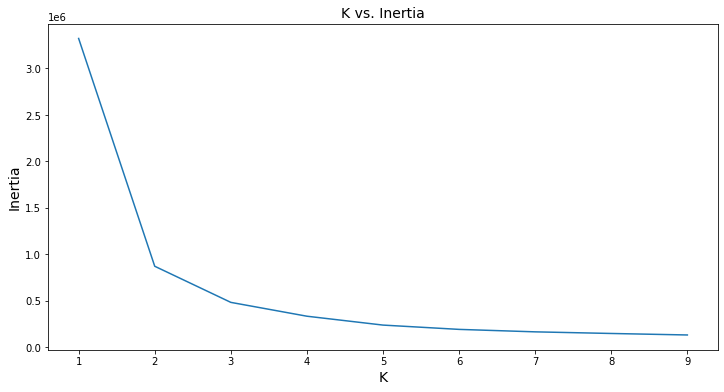

In [23]:
## Try different K and choose according to Elbow Method
k_with_inertia =[]
for i in range(1,10 ):
    km= KMeans(n_clusters=i)
    km.fit(df)
    k_with_inertia.append(km.inertia_)
    
## Plotting each K with the opposite Inertia
plt.figure(figsize=(12,6))
plt.plot(range(1,10),k_with_inertia)
plt.title('K vs. Inertia', fontsize=14)
plt.xlabel('K', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.show()

### Building Models

`K means`

In [24]:
km= KMeans(n_clusters=5)
y_predict = km.fit_predict(df)
y_predict

array([1, 3, 1, ..., 2, 4, 2])

In [25]:
df['cluster']= y_predict
df.head()

,temperatureHigh,humidity,uvIndex,cluster
0,9,0.60,2,1
1,4,0.90,2,3
2,8,0.76,3,1
3,7,0.69,3,3
4,4,0.88,2,3


categories of (clusters) --- 
 2    7975
1    6064
4    5445
3    5149
0    3226
Name: cluster, dtype: int64


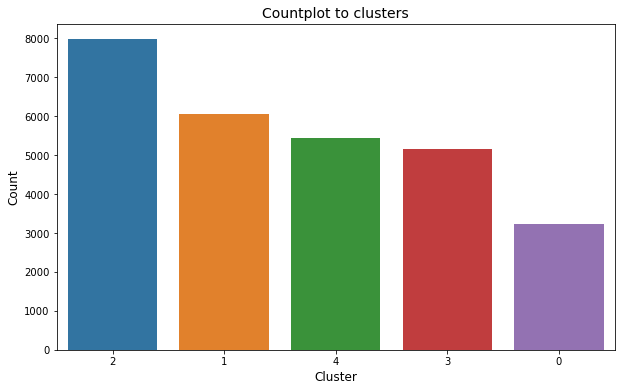

In [26]:
## showing the Distribution of clusters
clusters_val = df.cluster.value_counts()
print('categories of (clusters) --- \n', clusters_val)

## plotting it
plt.figure(figsize=(10,6))
sns.countplot(df.cluster,order= clusters_val.index,)
plt.title('Countplot to clusters' , fontsize = 14 )
plt.xlabel('Cluster', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()




In [27]:
df[df['cluster']==0].describe()

,temperatureHigh,humidity,uvIndex,cluster
count,3226.000000,3226.000000,3226.000000,3226.0
mean,34.730316,0.514423,9.095164,0.0
std,2.685440,0.262057,2.037005,0.0
min,31.000000,0.020000,4.000000,0.0
25%,33.000000,0.270000,7.000000,0.0
50%,34.000000,0.585000,9.000000,0.0
75%,37.000000,0.740000,11.000000,0.0
max,44.000000,0.970000,12.000000,0.0


In [28]:
df[df['cluster']==2].describe()

,temperatureHigh,humidity,uvIndex,cluster
count,7975.000000,7975.000000,7975.000000,7975.0
mean,27.321630,0.743900,8.044639,2.0
std,2.079798,0.174968,1.985087,0.0
min,22.000000,0.040000,3.000000,2.0
25%,26.000000,0.710000,6.000000,2.0
50%,28.000000,0.780000,8.000000,2.0
75%,29.000000,0.850000,10.000000,2.0
max,31.000000,1.000000,12.000000,2.0


In [29]:
df[df['cluster']==1].describe()

,temperatureHigh,humidity,uvIndex,cluster
count,6064.000000,6064.000000,6064.000000,6064.0
mean,11.437170,0.687066,3.401550,1.0
std,2.233598,0.166915,1.583418,0.0
min,7.000000,0.090000,0.000000,1.0
25%,10.000000,0.590000,2.000000,1.0
50%,11.000000,0.710000,3.000000,1.0
75%,13.000000,0.810000,4.000000,1.0
max,16.000000,1.000000,12.000000,1.0


In [30]:
df[df['cluster']==4].describe()

,temperatureHigh,humidity,uvIndex,cluster
count,5445.000000,5445.000000,5445.000000,5445.0
mean,19.234711,0.670367,5.504316,4.0
std,2.369133,0.201105,1.887016,0.0
min,15.000000,0.040000,1.000000,4.0
25%,17.000000,0.540000,4.000000,4.0
50%,19.000000,0.680000,5.000000,4.0
75%,21.000000,0.830000,7.000000,4.0
max,24.000000,1.000000,12.000000,4.0


In [31]:
df[df['cluster']==3].describe()

,temperatureHigh,humidity,uvIndex,cluster
count,5149.000000,5149.000000,5149.000000,5149.0
mean,3.640707,0.731497,2.251505,3.0
std,2.337546,0.153127,1.467817,0.0
min,0.000000,0.160000,0.000000,3.0
25%,2.000000,0.640000,1.000000,3.0
50%,4.000000,0.770000,2.000000,3.0
75%,6.000000,0.850000,3.000000,3.0
max,7.000000,1.000000,12.000000,3.0


`Preprocessing after clusters`

In [32]:
cluster_names = ['very low','low', 'mid','high', 'very high']
df['cluster'] = df['cluster'].replace([4,0,2,1,3], cluster_names)
df.head()

,temperatureHigh,humidity,uvIndex,cluster
0,9,0.60,2,high
1,4,0.90,2,very high
2,8,0.76,3,high
3,7,0.69,3,very high
4,4,0.88,2,very high


In [33]:
## drop and separate label 
x = df.drop('cluster',axis='columns')
y = df['cluster']

In [34]:
## splitting data to train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f'shape of training data is {X_train.shape}')
print('\n')
print(f'shape of testing data is {X_test.shape}')

shape of training data is (22287, 3)


shape of testing data is (5572, 3)


`Decission Tree` 

In [35]:
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [36]:
print(f'the accurecy on training data is {model.score(X_train,y_train)}')
print('\n')
print(f'the accurecy on testing data is {model.score(X_test,y_test)}')

the accurecy on training data is 1.0


the accurecy on testing data is 0.9998205312275664


# save model









In [38]:
joblib.dump(model, 'spread_virus.pkl')

['spread_virus.pkl']

In [40]:
loaded_model= joblib.load('spread_virus.pkl')

In [42]:
loaded_model.predict([[20,0.8,12]])

array(['very low'], dtype=object)